In [ ]:
import numpy as np
import astropy
#import astroquery as atr
from astropy.io import fits
from astropy.constants import G
from astropy import units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp




In [ ]:
data = pd.read_csv('milkyway-result.csv')
data

,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,radial_velocity,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,4471092806623921792,272.171386,4.339006,0.383191,0.336824,-0.688238,1.012686,18.152777,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4469912412172760192,272.314398,2.948411,NaN,NaN,NaN,NaN,20.770570,0.816473,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4470053634992118016,273.075016,3.532693,NaN,NaN,NaN,NaN,20.991910,1.199650,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4471944485752608128,272.955043,6.248173,NaN,NaN,NaN,NaN,20.907011,1.140646,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4471944485752672128,272.958861,6.244117,NaN,NaN,NaN,NaN,20.907248,3.716721,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4471467087246488704,270.899922,5.489489,0.732702,-1.309593,-6.211516,0.965932,17.208030,1.316177,NaN,...,False,True,True,4400.5240,4.4283,-0.7039,1415.6719,0.0136,0.0104,0.0055
1996,4471467087247031424,270.895601,5.482582,-0.049679,-1.079723,-7.402715,1.129247,18.540080,1.011984,NaN,...,False,True,False,4930.5670,4.8457,-1.9474,1855.8597,0.0080,0.0064,0.0035
1997,4471467091540221696,270.896862,5.479103,0.136862,-3.216359,-2.181726,1.019785,18.464808,0.904785,NaN,...,False,True,False,5149.7344,4.7819,-3.2689,2173.5596,0.0050,0.0041,0.0023
1998,4471467091540235136,270.891614,5.481978,0.068427,-2.812933,-4.303475,1.008237,20.478607,0.585894,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.drop('radial_velocity',axis=1)
data

,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,phot_variable_flag,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,4471092806623921792,272.171386,4.339006,0.383191,0.336824,-0.688238,1.012686,18.152777,NaN,NOT_AVAILABLE,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4469912412172760192,272.314398,2.948411,NaN,NaN,NaN,NaN,20.770570,0.816473,NOT_AVAILABLE,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4470053634992118016,273.075016,3.532693,NaN,NaN,NaN,NaN,20.991910,1.199650,NOT_AVAILABLE,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4471944485752608128,272.955043,6.248173,NaN,NaN,NaN,NaN,20.907011,1.140646,NOT_AVAILABLE,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4471944485752672128,272.958861,6.244117,NaN,NaN,NaN,NaN,20.907248,3.716721,NOT_AVAILABLE,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4471467087246488704,270.899922,5.489489,0.732702,-1.309593,-6.211516,0.965932,17.208030,1.316177,NOT_AVAILABLE,...,False,True,True,4400.5240,4.4283,-0.7039,1415.6719,0.0136,0.0104,0.0055
1996,4471467087247031424,270.895601,5.482582,-0.049679,-1.079723,-7.402715,1.129247,18.540080,1.011984,NOT_AVAILABLE,...,False,True,False,4930.5670,4.8457,-1.9474,1855.8597,0.0080,0.0064,0.0035
1997,4471467091540221696,270.896862,5.479103,0.136862,-3.216359,-2.181726,1.019785,18.464808,0.904785,NOT_AVAILABLE,...,False,True,False,5149.7344,4.7819,-3.2689,2173.5596,0.0050,0.0041,0.0023
1998,4471467091540235136,270.891614,5.481978,0.068427,-2.812933,-4.303475,1.008237,20.478607,0.585894,NOT_AVAILABLE,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data.dropna()
data

,source_id,ra,dec,parallax,pmra,pmdec,ruwe,phot_g_mean_mag,bp_rp,phot_variable_flag,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
421,4471464239681947008,270.759394,5.363542,0.159018,3.801203,-8.564798,0.997852,17.991650,1.188734,NOT_AVAILABLE,...,False,True,True,4740.4766,4.8159,-1.3569,1370.4208,0.0186,0.0147,0.0079
424,4471464239688110592,270.764761,5.357903,0.166615,-3.809700,-1.588296,0.947890,17.526043,1.097742,NOT_AVAILABLE,...,False,True,True,4888.2560,4.3982,-2.1081,2020.0650,0.0295,0.0235,0.0128
427,4471464239688117760,270.752787,5.358883,0.224431,-0.951188,-3.605270,1.001223,17.414423,1.014324,NOT_AVAILABLE,...,False,True,True,4952.7690,4.4337,-1.3697,2144.9648,0.0095,0.0077,0.0042
429,4471464239688121600,270.756929,5.368803,1.041043,-3.411816,-5.211124,1.023432,17.626370,1.802380,NOT_AVAILABLE,...,False,True,True,3688.0073,4.4258,-1.1398,629.0402,0.1155,0.0818,0.0443
431,4471464269747338112,270.734862,5.353174,0.081007,-2.386397,-3.808699,1.079391,18.301638,0.937799,NOT_AVAILABLE,...,False,True,False,5287.5757,4.7654,-2.7657,2249.7980,0.0086,0.0071,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,4471467087246459264,270.904095,5.483009,0.149028,1.071723,-8.424809,1.148105,18.688395,1.144569,NOT_AVAILABLE,...,False,True,False,4650.8280,4.8656,-1.6791,1610.6245,0.0046,0.0036,0.0020
1993,4471467087246459520,270.896673,5.482640,0.852787,-0.022456,-4.856737,0.902275,17.437244,1.580467,NOT_AVAILABLE,...,False,True,True,4453.2430,4.6342,0.1126,1051.1648,0.4779,0.3554,0.1879
1995,4471467087246488704,270.899922,5.489489,0.732702,-1.309593,-6.211516,0.965932,17.208030,1.316177,NOT_AVAILABLE,...,False,True,True,4400.5240,4.4283,-0.7039,1415.6719,0.0136,0.0104,0.0055
1996,4471467087247031424,270.895601,5.482582,-0.049679,-1.079723,-7.402715,1.129247,18.540080,1.011984,NOT_AVAILABLE,...,False,True,False,4930.5670,4.8457,-1.9474,1855.8597,0.0080,0.0064,0.0035


In [ ]:
# Extract the celestial coordinates (RA, Dec)
ra = data['ra']#*u.deg
dec = data['dec']#*u.deg
ra_rad=ra*(np.pi/180)
dec_rad=dec*(np.pi/180)

# Create a SkyCoord object with the given coordinates
coords = SkyCoord(ra=ra, dec=dec,unit=(u.deg,u.deg), frame='icrs')

# Convert the celestial coordinates to Cartesian coordinates (X, Y, Z)
cartesian_coords = coords.represent_as(CartesianRepresentation)

# Extract the X, Y, Z coordinates
x = cartesian_coords.x/1000#u.kpc
y = cartesian_coords.y/1000#u.kpc
z = cartesian_coords.z/1000#u.kpc

# Print the Cartesian coordinates
print("X: ", x)
print("Y: ", y)
print("Z: ", z)

X:  [1.31955169e-05 1.32888827e-05 1.30808020e-05 1.31525607e-05
 1.27694655e-05 1.27654793e-05 1.27447172e-05 1.27589495e-05
 1.28635125e-05 1.28464878e-05 1.27116770e-05 1.26751841e-05
 1.30597779e-05 1.29292945e-05 1.30574823e-05 1.33381807e-05
 1.33253075e-05 1.34641136e-05 1.33723481e-05 1.33000848e-05
 1.32447229e-05 1.34632486e-05 1.35370827e-05 1.36418678e-05
 1.34201783e-05 1.32961084e-05 1.32020149e-05 1.32395367e-05
 1.32300634e-05 1.32551698e-05 1.31895995e-05 1.32324018e-05
 1.31634577e-05 1.33076499e-05 1.32038466e-05 1.25993994e-05
 1.25101098e-05 1.27489941e-05 1.27103735e-05 1.26129647e-05
 1.25126210e-05 1.25748777e-05 1.26263894e-05 1.25292869e-05
 1.25141367e-05 1.27786456e-05 1.27635670e-05 1.28795660e-05
 1.28727854e-05 1.26613215e-05 1.23906317e-05 1.23831722e-05
 1.25372539e-05 1.23722977e-05 1.25241389e-05 1.23617594e-05
 1.26115342e-05 1.26368734e-05 1.25923889e-05 1.26407061e-05
 1.25173249e-05 1.26702463e-05 1.28701017e-05 1.30905652e-05
 1.29042592e-05 1.29

In [ ]:
#Obtaining the proper momentum
pmra=data['pmra']#*u.mas*u.m/u.year
pmdec=data['pmdec']#*u.mas*u.m/u.year
parallax=data['parallax']#*u.mas
distance=(1.0/parallax)#*u.m
# Convert the proper motions from milliarcseconds per year (mas/yr) to radians per year (rad/yr)
pmra_rad = pmra * (parallax*4*np.pi)#*u.rad
pmdec_rad = pmdec * (parallax*4*np.pi)#*u.rad
# Calculate the Cartesian momentum components (v_x, v_y)
p_x = pmra_rad * (distance/ 3.0857e19)#/(u.rad*u.yr)
p_y = pmdec_rad * (distance/ 3.0857e19)#/(u.rad*u.yr)
# Assign the radial velocity as the v_z component
p_z = np.sqrt(pmra_rad**2+pmdec_rad**2)

print("p_x: ", p_x)
print("p_y: ", p_y)
print("p_z: ", p_z)


p_x:  421     1.548022e-18
424    -1.551483e-18
427    -3.873670e-19
429    -1.389446e-18
431    -9.718492e-19
            ...     
1992    4.364543e-19
1993   -9.145124e-21
1995   -5.333259e-19
1996   -4.397121e-19
1997   -1.309847e-18
Length: 510, dtype: float64
p_y:  421    -3.487974e-18
424    -6.468263e-19
427    -1.468230e-18
429    -2.122206e-18
431    -1.551075e-18
            ...     
1992   -3.430965e-18
1993   -1.977884e-18
1995   -2.529611e-18
1996   -3.014722e-18
1997   -8.884980e-19
Length: 510, dtype: float64
p_z:  421     18.724694
424      8.642007
427     10.515788
429     81.484218
431      4.575317
          ...    
1992    15.904646
1993    52.047478
1995    58.449192
1996     4.670348
1997     6.684210
Length: 510, dtype: float64


In [ ]:
#Definiendo Potencial
def bulge_potential(x, y, z, M_bulge, a_bulge):
    denominator = x ** 2 + y ** 2 + z ** 2 + a_bulge ** 2
    potential0 = -G.value * M_bulge / np.sqrt(denominator)
    potential = np.where(np.isnan(potential0), 0.0, potential0)
    return potential

# Define the parameters for each component
M_bulge = 2.0e10 #*u.Msun  # Mass of the bulge (example value)
a_bulge = 2.0#u.kpc)  # Scale length of the bulge (example value)

# Calculate the potentials for each component
bulge_p = bulge_potential(x,y,z, M_bulge, a_bulge)
bulge_p

<Quantity [-0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -0.66742992, -0.66742992, -0.66742992, -0.66742992, -0.66742992,
           -

In [ ]:
#Defining Hamiltonian
Omega= 0.22#*u.kpc/u.s
H=0.5*(p_x**2+p_y**2+p_z**2)+bulge_p-Omega*(x*p_y-y*p_x)


In [ ]:
# Define the symbolic variables
x1, y1, z1,M_bulge1, a_bulge1 = sp.symbols('x y z  M_bulge a_bulge')
# Define the expression for T
r = sp.sqrt(x1**2 + y1**2)
T = - G.value * M_bulge1 / sp.sqrt(x1**2 + y1**2 + z1**2 + a_bulge1**2)\

# Compute the symbolic derivative of T with respect to r
derivative_T = T.diff(z1)

# Simplify the derivative expression
#derivative_T_simplified = sp.simplify(derivative_T)

# Print the simplified derivative expression
print("Derivative of T with respect to r:")
print(derivative_T)


Derivative of T with respect to r:
6.6743e-11*M_bulge*z/(a_bulge**2 + x**2 + y**2 + z**2)**(3/2)


In [ ]:
# Initialize the state
state_prev = [x, y, z, p_x, p_y, p_z]
# Initialize GALI2 index
gali2_prev = 1.0

# Define the symbolic variables
#x, y, z, p_x, p_y, p_z = sp.symbols('x y z p_x p_y p_z')

# Define the equations of motion as a lambda function
# Define the equations of motion as a lambda function
equations_of_motion = lambda state: np.array([
    state[3] + Omega * state[1],
    state[4] - Omega * state[0],
    state[5],
    G.value*M_bulge*state[0]/(a_bulge**2 + state[0]**2 + state[1]**2 + state[2]**2)**(3/2)+Omega*y,\
    G.value*M_bulge*state[1]/(a_bulge**2 + state[0]**2 + state[1]**2 + state[2]**2)**(3/2)-Omega*x,\
    G.value*M_bulge*state[2]/(a_bulge**2 + state[0]**2 + state[1]**2 + state[2]**2)**(3/2)
])
equations_of_motion(state_prev)
#eq_motion= equations_of_motion(state_prev).dropnan(inplace=True)


array([[-2.19017524e-04, -2.19019273e-04, -2.19019528e-04, ...,
        -2.18964017e-04, -2.18966811e-04, -2.18968011e-04],
       [-2.90301372e-06, -2.92355420e-06, -2.87777644e-06, ...,
        -3.43946475e-06, -3.42298834e-06, -3.42782918e-06],
       [ 1.87246944e+01,  8.64200743e+00,  1.05157881e+01, ...,
         5.84491921e+01,  4.67034754e+00,  6.68420984e+00],
       [-2.16815754e-04, -2.16801924e-04, -2.16836899e-04, ...,
        -2.16355379e-04, -2.16370669e-04, -2.16368198e-04],
       [-1.69015299e-04, -1.69037166e-04, -1.68991582e-04, ...,
        -1.69511168e-04, -1.69496811e-04, -1.69502562e-04],
       [ 1.55969652e-05,  1.55806166e-05,  1.55834583e-05, ...,
         1.59621056e-05,  1.59420842e-05,  1.59319984e-05]])

In [ ]:
#Definiendo Rugen Kutta
def runge_kutta_integration(state, dt):
    k1 = dt * equations_of_motion(state)
    k2 = dt * equations_of_motion(state + 0.5 * k1)
    k3 = dt * equations_of_motion(state + 0.5 * k2)
    k4 = dt * equations_of_motion(state + k3)

    state_next = state + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    return state_next

In [ ]:
#Initial conditions
t0 = 0.0
tmax = 10000.0
dt = 0.01
t_span = np.arange(t0, tmax, dt)
state = np.array([x, y, z, p_x, p_y, p_z])
gali2 = np.ones_like(t_span)
epsilon=1e-8

for t_idx, t in enumerate(t_span):
  perturbed_state = state + epsilon
  perturbed_trajectory = runge_kutta_integration(perturbed_state, dt)
  trajectory = runge_kutta_integration(state, dt)
  tangent_vectors = (perturbed_trajectory - trajectory) / epsilon

  # Compute the GALI2 index
  gali2[t_idx] += np.log(np.linalg.norm(tangent_vectors))/np.log(dt)

gali2

array([0.12731392, 0.12731392, 0.12731392, ..., 0.12731392, 0.12731392,
       0.12731392])

In [ ]:
np.log(gali2)

array([-2.06109944, -2.06109944, -2.06109944, ..., -2.06109944,
       -2.06109944, -2.06109944])

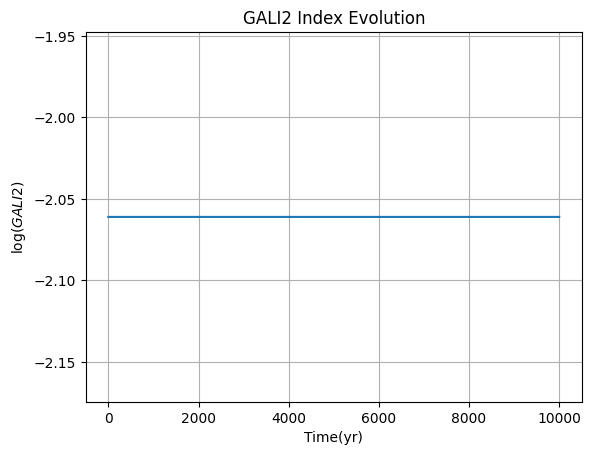

In [ ]:
# Plot the GALI2 index over time
plt.plot(t_span,np.log(gali2),'-')
plt.xlabel('Time(yr)')
plt.ylabel('$\log(GALI2)$')
plt.title('GALI2 Index Evolution')
plt.grid(True)
plt.savefig("gali2-milkyway.pdf")
plt.show()